# Imports

In [1]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

# Pure python function

In [2]:
def solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c):
    row, col = u.shape
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] - (c*dt/dx)*(un[i,j] - un[i-1,j])
                u[i,j] = u[i,j] - (c*dt/dy)*(un[i,j] - un[i,j-1])
    return 0    

# Numba accelerator

In [13]:
@njit(fastmath=True)
def solve_2d_linearconv_numba(u, un, nt, dt, dx, dy, c):
    row, col = u.shape
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] - (c*dt/dx)*(un[i,j] - un[i-1,j])
                u[i,j] = u[i,j] - (c*dt/dy)*(un[i,j] - un[i,j-1])
    return 0    

# Pyccel accelerator

In [14]:
@types('float[:,:]', 'float[:,:]', 'int', 'float', 'float','float','float')
def solve_2d_linearconv_pyccel(u, un, nt, dt, dx, dy, c):
    row, col = u.shape
    for n in range(nt):
        for j in range(col):
            for k in range(col):
                un[j, k] = u[j, k]
        for i in range(1, row-1):
            for j in range(1, col-1):
                u[i,j] = un[i,j] - (c*dt/dx)*(un[i,j] - un[i-1,j])
                u[i,j] = u[i,j] - (c*dt/dy)*(un[i,j] - un[i,j-1])
    return 0    

# Inputs

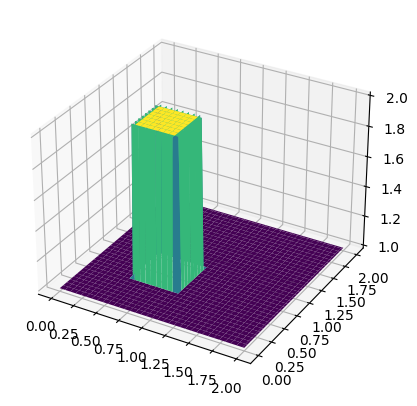

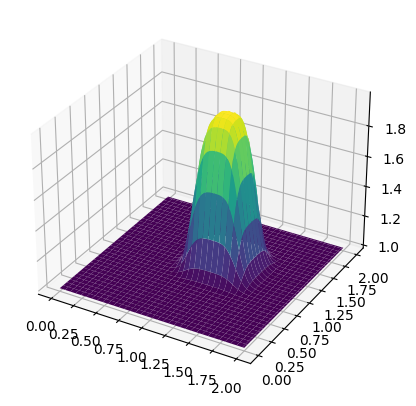

In [15]:
###variable declarations
nx = 101
ny = 101
nt = 100
c  = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u0 = np.ones((ny, nx)) ##create a 1xn vector of 1's
u0[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 
u = u0.copy()
un = np.ones((ny, nx)) 

solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u0[:], cmap=cm.viridis)

fig = pyplot.figure(figsize=(7, 5), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

# Call Functions

# Pure function

In [16]:
%timeit solve_2d_linearconv_pure(u, un, nt, dt, dx, dy, c)

1 loop, best of 3: 2 s per loop


# Function with numba accelerator

In [17]:
%timeit solve_2d_linearconv_numba(u, un, nt, dt, dx, dy, c)

The slowest run took 145.62 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 3.16 ms per loop


# Function with pyccel accelerator

In [18]:
solve_2d_linearconv_f90 = epyccel(solve_2d_linearconv_pyccel)

In [19]:
%timeit solve_2d_linearconv_f90(u, un, nt, dt, dx, dy, c)

1000 loops, best of 3: 1.46 ms per loop
